<a href="https://colab.research.google.com/github/jgzapata/prueba/blob/master/ScaleFree2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Distribución de grado, varios datasets

In [1]:
import pandas as pd
import numpy  as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
gte1crm = pd.read_csv('nuevosDatos/202207-gte-1-crm.csv',sep=',',on_bad_lines='warn')

FileNotFoundError: ignored

In [ ]:
gte1call = pd.read_csv('nuevosDatos/202207-gte-1-all.csv',sep=',',on_bad_lines='warn')

In [ ]:
all1crm = pd.read_csv('nuevosDatos/202207-all-crm.csv',sep=',',on_bad_lines='warn')

In [ ]:
all1all = pd.read_csv('nuevosDatos/202207-all-all.csv',sep=',',on_bad_lines='warn')

In [ ]:
gte1crm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716381 entries, 0 to 716380
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   device_id         716381 non-null  object 
 1   app_identifier    716381 non-null  object 
 2   category          716381 non-null  object 
 3   app_market_share  716381 non-null  float64
 4   embedding_app     716381 non-null  object 
 5   operator_name     716381 non-null  object 
 6   model             716381 non-null  object 
 7   manufacturer      716381 non-null  object 
dtypes: float64(1), object(7)
memory usage: 43.7+ MB


In [ ]:
all1all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770481 entries, 0 to 3770480
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   device_id         object 
 1   app_identifier    object 
 2   category          object 
 3   app_market_share  float64
 4   embedding_app     object 
 5   operator_name     object 
 6   model             object 
 7   manufacturer      object 
dtypes: float64(1), object(7)
memory usage: 230.1+ MB


In [ ]:
all1crm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955867 entries, 0 to 955866
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   device_id         955867 non-null  object 
 1   app_identifier    955867 non-null  object 
 2   category          955867 non-null  object 
 3   app_market_share  955867 non-null  float64
 4   embedding_app     955867 non-null  object 
 5   operator_name     955867 non-null  object 
 6   model             955867 non-null  object 
 7   manufacturer      955867 non-null  object 
dtypes: float64(1), object(7)
memory usage: 58.3+ MB


In [ ]:
gte1call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3446918 entries, 0 to 3446917
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   device_id         object 
 1   app_identifier    object 
 2   category          object 
 3   app_market_share  float64
 4   embedding_app     object 
 5   operator_name     object 
 6   model             object 
 7   manufacturer      object 
dtypes: float64(1), object(7)
memory usage: 210.4+ MB


In [ ]:
def cardDiff(X,Y):
    return len(X.symmetric_difference(Y))

In [ ]:
def lapla(A):
    Dg = sum(A)
    L=np.diag(Dg) - A
    return(L)

#### gte-1-all

In [ ]:
study = gte1call

In [ ]:
# selecciona nsample dispositivos distintos
nsample = 1000
DevIds=[]
while len(DevIds) < nsample:
    muestra = study.sample(1)
    ide = muestra.iat[0,0]
    if ide not in DevIds:
        DevIds.append(ide)
    print('\r',len(DevIds),end='')

#DevIds


 1000

In [ ]:
# para cada dispositivo en DevIds, crea la lista de sus apps
setApps = []
for i in range(len(DevIds)):
    setApps.append(set(study.loc[study['device_id'] == DevIds[i]]['app_identifier']) )
    print('\r',i,end='')

 999

In [ ]:
# Crea una matriz con las distancias = aplicaciones no en comun
A = np.zeros((len(DevIds),len(DevIds)))

for i in range(len(DevIds)):
    print('\r',i,end='')
    for j in range(len(DevIds)):
        A[i][j] = cardDiff(setApps[i],setApps[j]) 

 999

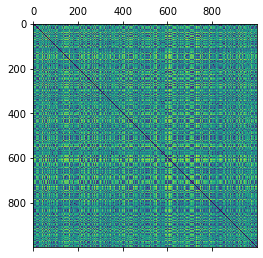

In [ ]:
plt.matshow(A)

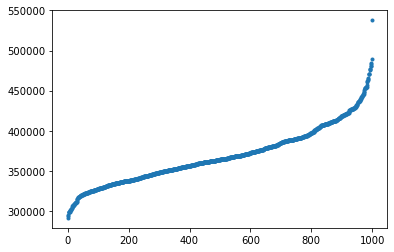

In [ ]:
grados = sum(A)
orden=np.sort(grados)
plt.plot(orden,'.')

In [ ]:
totApps = set()
for i in range(len(setApps)):
    totApps = totApps.union(setApps[i] )
    print('\r',i,end='')

 999

In [ ]:
NumApps = len(totApps)
NumApps

2307

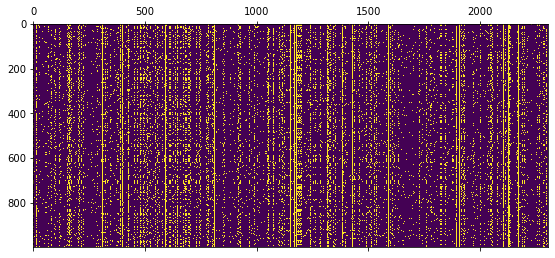

In [ ]:
B=np.zeros((len(DevIds),len(totApps))) 

listApps=list(totApps)
for i in range(len(DevIds)):
    for j in range(len(totApps)):
        if listApps[j] in setApps[i]:
            B[i][j] = 1

plt.matshow(B)

In [ ]:
penet = sum(B)/nsample

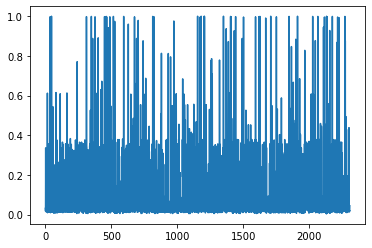

In [ ]:
plt.plot(penet)

#### all-crm

In [ ]:
study = all1crm

In [ ]:
# selecciona nsample dispositivos distintos
nsample = 1000
DevIds=[]
while len(DevIds) < nsample:
    muestra = study.sample(1)
    ide = muestra.iat[0,0]
    if ide not in DevIds:
        DevIds.append(ide)
    print('\r',len(DevIds),end='')

#DevIds


 1000

In [ ]:
# para cada dispositivo en DevIds, crea la lista de sus apps
setApps = []
for i in range(len(DevIds)):
    setApps.append(set(study.loc[study['device_id'] == DevIds[i]]['app_identifier']) )
    print('\r',i,end='')

 999

In [ ]:
# Crea una matriz con las distancias = aplicaciones no en comun
A = np.zeros((len(DevIds),len(DevIds)))

for i in range(len(DevIds)):
    print('\r',i,end='')
    for j in range(len(DevIds)):
        A[i][j] = cardDiff(setApps[i],setApps[j]) 

 999

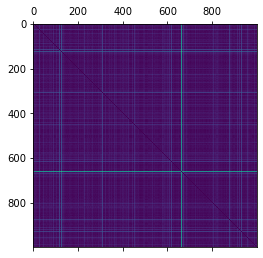

In [ ]:
plt.matshow(A)

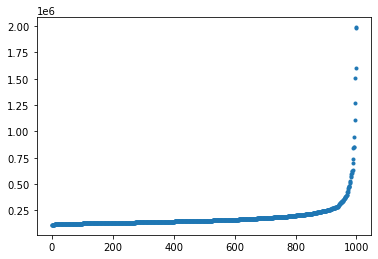

In [ ]:
grados = sum(A)
orden=np.sort(grados)
plt.plot(orden,'.')

In [ ]:
grados

array([ 487834.,  465894.,  485572.,  546042.,  565094.,  382134.,
        560538.,  384240.,  401496.,  390482.,  569072.,  440358.,
        396130.,  417986.,  429872.,  421432.,  433234.,  409556.,
        494230.,  383196.,  421780.,  466796.,  431826.,  418016.,
        465594.,  487822.,  488898.,  424180.,  382532.,  545414.,
        459226.,  753002.,  400694.,  494996.,  401436.,  397494.,
        418410.,  397238.,  372710.,  445684.,  396234.,  549328.,
        399878.,  364408.,  375192.,  476762.,  408070.,  453436.,
        495732.,  396216.,  435626.,  414856.,  430016.,  372052.,
        556460.,  431496.,  457832.,  388972.,  416256.,  444432.,
        368046.,  503140.,  409630.,  404250.,  387008.,  420568.,
        393786.,  467132.,  450274.,  460930., 2020756.,  404206.,
        475642.,  475876.,  415292.,  402678.,  509108.,  366756.,
        418352.,  444888.,  458280.,  413122.,  365072.,  406228.,
        386308.,  412528.,  475570.,  403166.,  534754.,  3929

In [ ]:
totApps = set()
for i in range(len(setApps)):
    totApps = totApps.union(setApps[i] )
    print('\r',i,end='')

 999625

In [ ]:
NumApps = len(totApps)

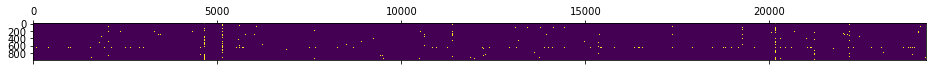

In [ ]:
B=np.zeros((len(DevIds),len(totApps))) 

listApps=list(totApps)
for i in range(len(DevIds)):
    for j in range(len(totApps)):
        if listApps[j] in setApps[i]:
            B[i][j] = 1

plt.matshow(B)

In [ ]:
penet = sum(B)/nsample

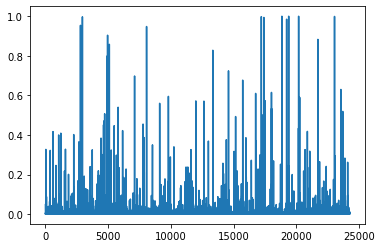

In [ ]:
plt.plot(penet)

#### all-all

In [ ]:
study = all1all

In [ ]:
# selecciona nsample dispositivos distintos
nsample = 1000
DevIds=[]
while len(DevIds) < nsample:
    muestra = study.sample(1)
    ide = muestra.iat[0,0]
    if ide not in DevIds:
        DevIds.append(ide)
    print('\r',len(DevIds),end='')

#DevIds


 1000

In [ ]:
# para cada dispositivo en DevIds, crea la lista de sus apps
setApps = []
for i in range(len(DevIds)):
    setApps.append(set(study.loc[study['device_id'] == DevIds[i]]['app_identifier']) )
    print('\r',i,end='')

 999

In [ ]:
# Crea una matriz con las distancias = aplicaciones no en comun
A = np.zeros((len(DevIds),len(DevIds)))

for i in range(len(DevIds)):
    print('\r',i,end='')
    for j in range(len(DevIds)):
        A[i][j] = cardDiff(setApps[i],setApps[j]) 

 999132

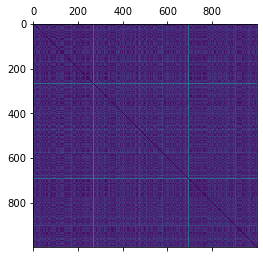

In [ ]:
plt.matshow(A)

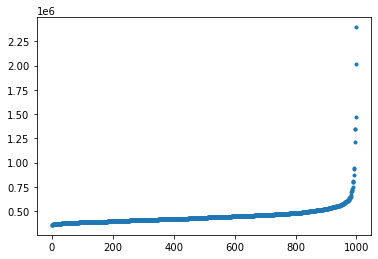

In [ ]:
grados = sum(A)
orden=np.sort(grados)
plt.plot(orden,'.')

In [ ]:
totApps = set()
for i in range(len(setApps)):
    totApps = totApps.union(setApps[i] )
    print('\r',i,end='')

 999

In [ ]:
NumApps = len(totApps)
NumApps

23718

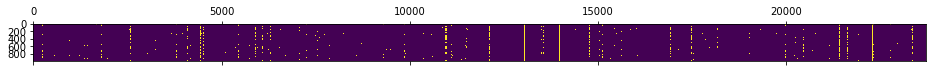

In [ ]:
B=np.zeros((len(DevIds),len(totApps))) 

listApps=list(totApps)
for i in range(len(DevIds)):
    for j in range(len(totApps)):
        if listApps[j] in setApps[i]:
            B[i][j] = 1

plt.matshow(B)

In [ ]:
penet = sum(B)/nsample

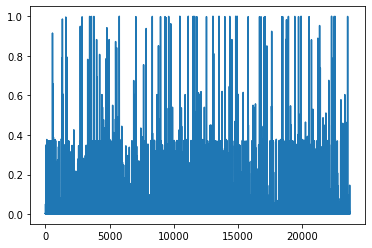

In [ ]:
plt.plot(penet)

#### gte-1-crm

In [ ]:
study = gte1call

In [ ]:
# selecciona nsample dispositivos distintos
nsample = 1000
DevIds=[]
while len(DevIds) < nsample:
    muestra = study.sample(1)
    ide = muestra.iat[0,0]
    if ide not in DevIds:
        DevIds.append(ide)
    print('\r',len(DevIds),end='')

#DevIds


 1000

In [ ]:
# para cada dispositivo en DevIds, crea la lista de sus apps
setApps = []
for i in range(len(DevIds)):
    setApps.append(set(study.loc[study['device_id'] == DevIds[i]]['app_identifier']) )
    print('\r',i,end='')

 999

In [ ]:
# Crea una matriz con las distancias = aplicaciones no en comun
A = np.zeros((len(DevIds),len(DevIds)))

for i in range(len(DevIds)):
    print('\r',i,end='')
    for j in range(len(DevIds)):
        A[i][j] = cardDiff(setApps[i],setApps[j]) 

 999

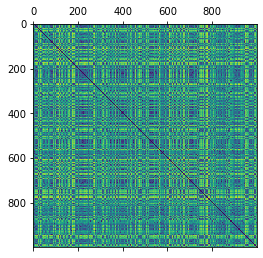

In [ ]:
plt.matshow(A)

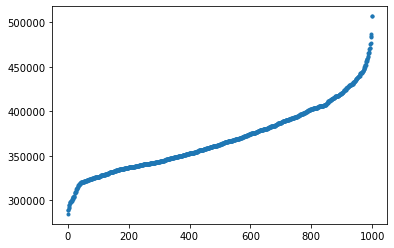

In [ ]:
grados = sum(A)
orden=np.sort(grados)
plt.plot(orden,'.')

In [ ]:
max(orden)

507019.0

In [ ]:
hist=np.histogram(grados,bins=500)

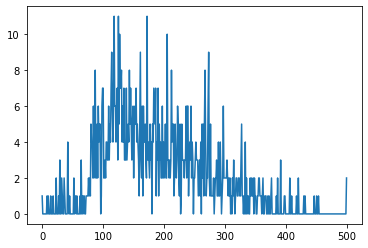

In [ ]:
plt.plot(hist[0])

In [ ]:
unique, counts = np.unique(hist, return_counts=True)

ValueError: operands could not be broadcast together with shapes (501,) (500,) 

In [ ]:
plt.plot(unique, counts,'.')

NameError: name 'array' is not defined

In [ ]:
totApps = set()
for i in range(len(setApps)):
    totApps = totApps.union(setApps[i] )
    print('\r',i,end='')

 999

In [ ]:
NumApps = len(totApps)
NumApps

2307

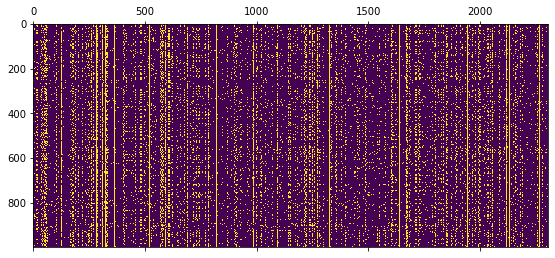

In [ ]:
B=np.zeros((len(DevIds),len(totApps))) 

listApps=list(totApps)
for i in range(len(DevIds)):
    for j in range(len(totApps)):
        if listApps[j] in setApps[i]:
            B[i][j] = 1

plt.matshow(B)

In [ ]:
penet = sum(B)/nsample

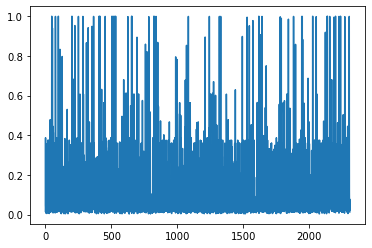

In [ ]:
plt.plot(penet)